# Instacart Market Basket Analysis

### To identify what the customer is going to buy next



Submissions will be evaluated based on their mean F1 score.

Submission File

For each order_id in the test set, you should predict a space-delimited list of product_ids for that order. If you wish to predict an empty order, you should submit an explicit 'None' value. You may combine 'None' with product_ids. The spelling of 'None' is case sensitive in the scoring metric. The file should have a header and look like the following:

order_id,products  
17,1 2  
34,None  
137,1 2 3  
etc.

The dataset for this competition is a relational set of files describing customers' orders over time. The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, we provide between 4 and 100 of their orders, with the sequence of products purchased in each order. We also provide the week and hour of day the order was placed, and a relative measure of time between orders. For more information, see the blog post accompanying its public release.


** "The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017**

The key to understand the dataset and the train / test split is the orders table (orders.csv)

Take for example user_id == 1 , which happens to be a train user (train_user.png). He has 10 prior orders, and 1 train order. The product details for these 11 orders are provided in order_products__prior.csv and in order_products__train.csv

Similarly, user_id == 4 is a test user (test_user.png). He has 5 prior orders, and his 6th order (order_id == 329954) is a test order. Indeed you should find order_id == 329954 in sample_submission.csv

Reference : https://www.kaggle.com/c/instacart-market-basket-analysis/discussion/33448

### Function to download each dataset from kaggle using username and password

In [2]:
# function to download kaggle datasets


def download_extract_zip_url(dataset_folder,download_url,user=None,passwrd=None):
    import requests
    import zipfile, io
    import os
    from getpass import getpass
    # The direct link to the Kaggle data set
    
    print ("To download data from",download_url)

    # The local path where the data set is saved.
    local_filename = download_url.split('/')[-1]
    local_filename_wo_ext = local_filename.split('.')[0]
    print("To save as",local_filename)
    
    
    if not user:
        user    = getpass()
        passwrd = getpass()
    
    # Kaggle Username and Password
    kaggle_info = {'UserName': user, 'Password': passwrd}
    if os.path.exists(dataset_folder+'/'+local_filename_wo_ext):
        print('- %s database exists \n' %(local_filename_wo_ext))
    else:
        # Attempts to download the CSV file. Gets rejected because we are not logged in.
        r = requests.get(download_url)

        # Login to Kaggle and retrieve the data.
        r = requests.post(r.url, data = kaggle_info)


        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall(dataset_folder+'/'+local_filename_wo_ext)
        print('--> Downloaded %s dataset <-- \n' %(local_filename_wo_ext))

### Downloading all datasets

In [3]:
# Downloaded all dataset files to datasets folder
from getpass import getpass
user    = getpass()
passwrd = getpass()
download_extract_zip_url('datasets','https://www.kaggle.com/c/instacart-market-basket-analysis/download/order_products__prior.csv.zip',user,passwrd)
download_extract_zip_url('datasets','https://www.kaggle.com/c/instacart-market-basket-analysis/download/departments.csv.zip',user,passwrd)
download_extract_zip_url('datasets','https://www.kaggle.com/c/instacart-market-basket-analysis/download/aisles.csv.zip',user,passwrd)
download_extract_zip_url('datasets','https://www.kaggle.com/c/instacart-market-basket-analysis/download/order_products__train.csv.zip',user,passwrd)
download_extract_zip_url('datasets','https://www.kaggle.com/c/instacart-market-basket-analysis/download/orders.csv.zip',user,passwrd)
download_extract_zip_url('datasets','https://www.kaggle.com/c/instacart-market-basket-analysis/download/products.csv.zip',user,passwrd)
download_extract_zip_url('datasets','https://www.kaggle.com/c/instacart-market-basket-analysis/download/sample_submission.csv.zip',user,passwrd)



········
········
To download data from https://www.kaggle.com/c/instacart-market-basket-analysis/download/order_products__prior.csv.zip
To save as order_products__prior.csv.zip
- order_products__prior database exists 

To download data from https://www.kaggle.com/c/instacart-market-basket-analysis/download/departments.csv.zip
To save as departments.csv.zip
- departments database exists 

To download data from https://www.kaggle.com/c/instacart-market-basket-analysis/download/aisles.csv.zip
To save as aisles.csv.zip
- aisles database exists 

To download data from https://www.kaggle.com/c/instacart-market-basket-analysis/download/order_products__train.csv.zip
To save as order_products__train.csv.zip
- order_products__train database exists 

To download data from https://www.kaggle.com/c/instacart-market-basket-analysis/download/orders.csv.zip
To save as orders.csv.zip
- orders database exists 

To download data from https://www.kaggle.com/c/instacart-market-basket-analysis/download/pro

### Storing datasets in variables

In [4]:
# load data

import pandas as pd
import numpy as np

orders = pd.read_csv("datasets/orders/orders.csv")
departments = pd.read_csv("datasets/departments/departments.csv")
aisles = pd.read_csv("datasets/aisles/aisles.csv")
order_products_train = pd.read_csv("datasets/order_products__train/order_products__train.csv")
order_products_prior = pd.read_csv("datasets/order_products__prior/order_products__prior.csv")
products = pd.read_csv("datasets/products/products.csv")

## Exploring 'orders' dataset

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

#print(orders.dtypes)
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### Plotting 'orders' dataset

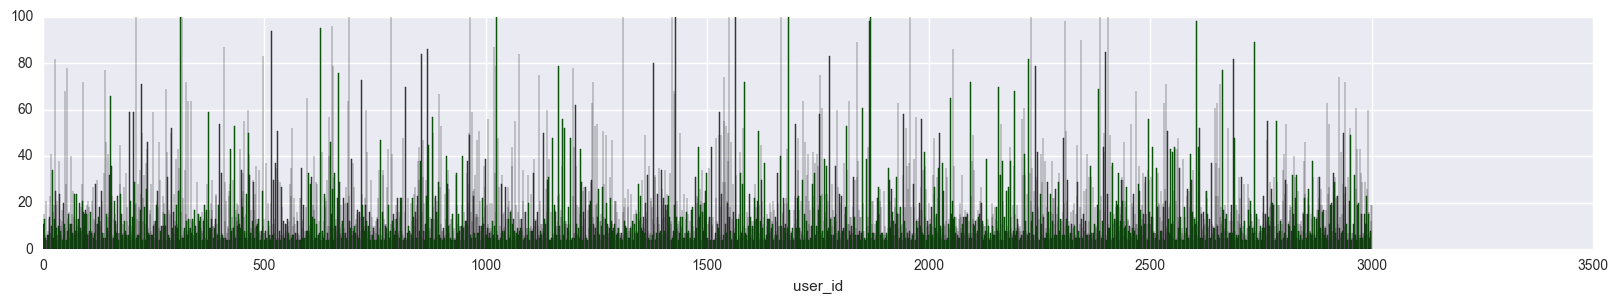

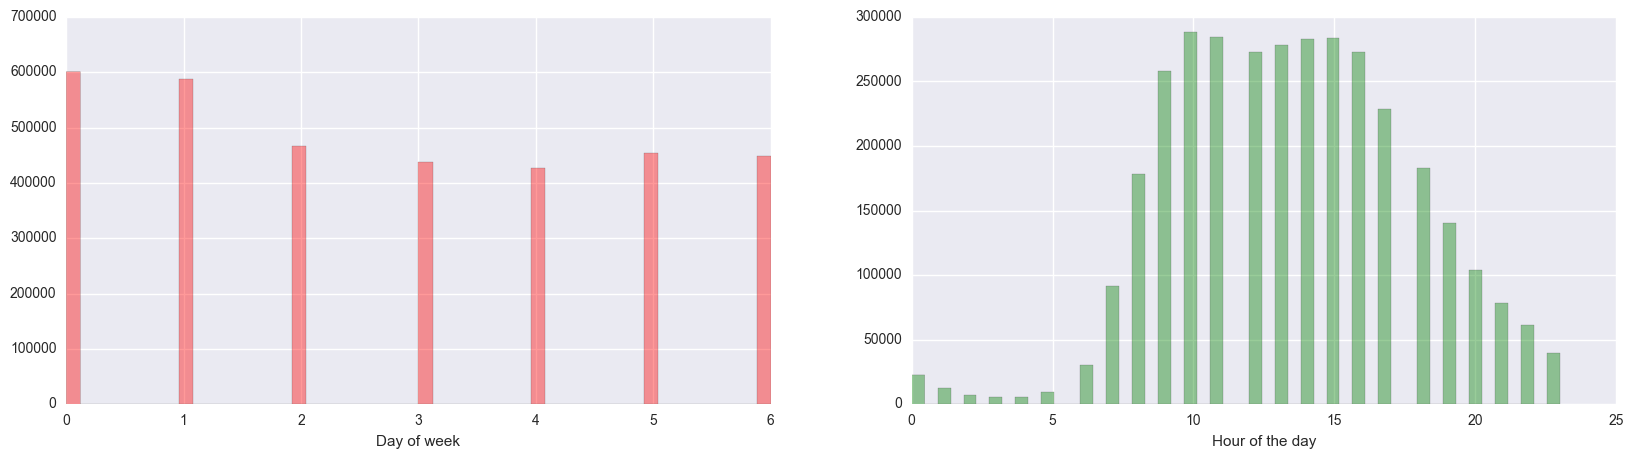

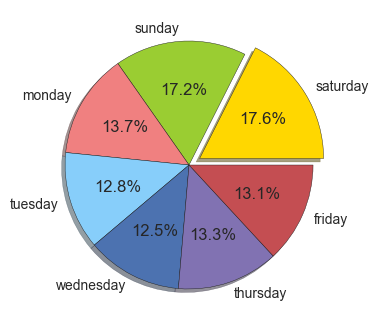

In [6]:
sns.set(color_codes = True)
import collections


#print(counter.keys())
# Plotting number of orders per person
counter=collections.Counter(orders['user_id'])
plt.figure(1,figsize=(20,3))
plt.bar(list(counter.keys())[:3000],list(counter.values())[:3000],facecolor='green');
plt.xlabel('user_id')

# Plotting number of orders made on particular day of week
plt.figure(2, figsize=(20,5))
plt.subplot(121)
sns.distplot((orders['order_dow']),kde = False, color = 'red', axlabel = 'Day of week');

# Plotting number of orders made on particular hour of day
plt.subplot(122)
sns.distplot((orders['order_hour_of_day']),kde = False, color = 'green', axlabel = 'Hour of the day');

# Considering 0-saturday 1-sunday 2-monday 3-tuesday 4-wednesday 5-thursday 6-friday
plt.figure(3,figsize=(4,4))
counter_dow= collections.Counter(orders['order_dow'])
labels=['saturday','sunday','monday','tuesday','wednesday','thursday','friday']
explode = (0.1, 0, 0, 0, 0 ,0,0)
color = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'b','m','r']
plt.pie(list(counter_dow.values()),autopct='%1.1f%%',shadow=True, colors=color, labels=labels, explode =explode);

## Outcome:

1. This dataset contains customers with repeated orders of the order of 100
2. Customers usually buy between 10 am to 8 pm
3. As we see, A lot of customers buy their grocery on Weekends, especially saturday. 



## Exploring departments dataset

In [7]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## Exploring 'aisles' dataset

In [8]:
print(aisles['aisle'][0:20])
print(len(aisles))

0            prepared soups salads
1                specialty cheeses
2              energy granola bars
3                    instant foods
4       marinades meat preparation
5                            other
6                    packaged meat
7                  bakery desserts
8                      pasta sauce
9                 kitchen supplies
10                cold flu allergy
11                     fresh pasta
12                  prepared meals
13          tofu meat alternatives
14                packaged seafood
15                     fresh herbs
16              baking ingredients
17    bulk dried fruits vegetables
18                   oils vinegars
19                    oral hygiene
Name: aisle, dtype: object
134


## Exploring 'products' dataset

In [12]:
print(products.head())
print(len(products))

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
49688


In [13]:
order_products_prior[0:20]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


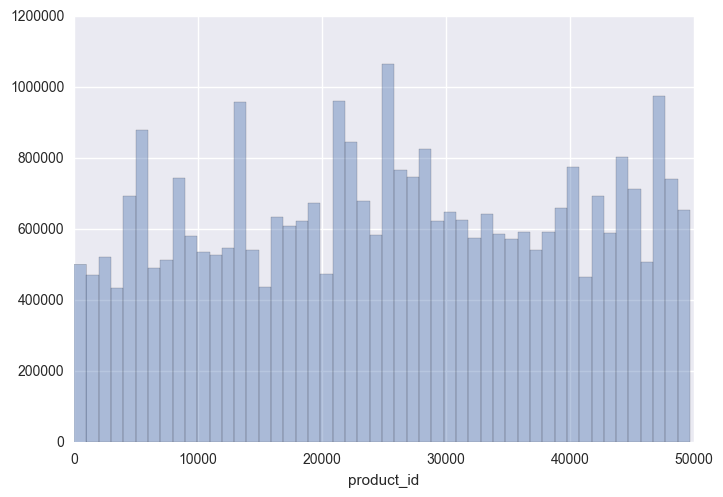

In [15]:

sns.distplot(order_products_prior['product_id'], kde =False)

In [17]:
counter_product= collections.Counter(order_products_prior['product_id'])

most_common_products = counter_product.most_common(10)

print(most_common_products[1])

product_count = order_products_prior.product_id.value_counts()

(13176, 379450)


In [21]:
prod_dict=products[['product_id','product_name']].to_dict()

a=[]
most_comm_prod=dict()
for key, value in most_common_products:
    a=products[products.product_id == key].ix[:,'product_name'].values
    most_comm_prod[a[0]]=value

AttributeError: 'dict' object has no attribute 'iter'

<Container object of 10 artists>

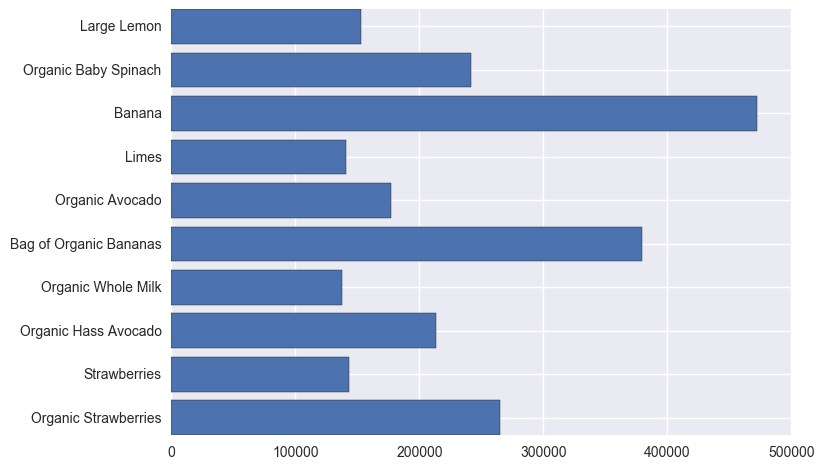

In [22]:
x = list(range(1,len(most_comm_prod)+1))
y = list(most_comm_prod.values())
my_xticks = list(most_comm_prod.keys())

plt.yticks(x, my_xticks, rotation=0)
plt.barh(x,y, align='center')



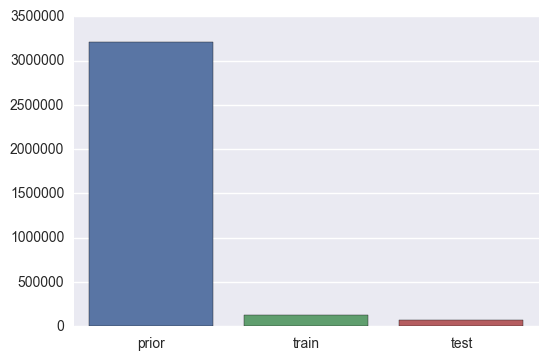

In [23]:
# train test prio proportion
datatype = orders.eval_set.value_counts()
plt.figure(figsize=(6,4))
sns.barplot(datatype.index, datatype.values)
plt.show()

## Lets learn a bit more about a specific customer

In [25]:
# Explor specific user data


user_data = orders[orders.user_id==1]

print(user_data)

    order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0    2539329        1    prior             1          2                  8   
1    2398795        1    prior             2          3                  7   
2     473747        1    prior             3          3                 12   
3    2254736        1    prior             4          4                  7   
4     431534        1    prior             5          4                 15   
5    3367565        1    prior             6          2                  7   
6     550135        1    prior             7          1                  9   
7    3108588        1    prior             8          1                 14   
8    2295261        1    prior             9          1                 16   
9    2550362        1    prior            10          4                  8   
10   1187899        1    train            11          4                  8   

    days_since_prior_order  
0                      NaN  
1    

In [102]:
cust_orders = pd.DataFrame();


for order in (user_data[user_data.eval_set=='prior'].order_id):
    cust_orders = cust_orders.append(order_products_prior[order_products_prior.order_id==order])


In [179]:
# Assuming DOW as below to give a better picture
#dow = pd.DataFrame({'0': 'saturday', '1' : 'sunday', '2': 'monday', '3':'tuesday',  '4':'wednesday', '5':'thursday', '6':'friday'},columns=['a', 'b', 'c', 'd', 'e'])
dow = pd.DataFrame({'num_dow' : pd.Series([0,1,2,3,4,5,6], index=[0,1,2,3,4,5,6]),
     'day' : pd.Series(['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'], index=[0,1,2,3,4,5,6])})

In [231]:
# Merging all datasets to obtain a specific customers buying pattern

cust_data = cust_orders.merge(user_data[user_data.eval_set=='prior'], left_on='order_id', right_on='order_id', how='outer')
cust_data = cust_data.merge(products , left_on = 'product_id', right_on = 'product_id' , how= 'left')
cust_data = cust_data.merge(aisles , left_on = 'aisle_id', right_on = 'aisle_id' , how= 'left')
cust_data = cust_data.merge(departments , left_on = 'department_id', right_on = 'department_id' , how= 'left')
cust_data = cust_data.merge(dow , left_on = 'order_dow', right_on = 'num_dow' , how= 'left')

cust_data = cust_data[['user_id','order_id','order_number','product_id','aisle_id','department_id','eval_set','add_to_cart_order','reordered','order_dow','order_hour_of_day','days_since_prior_order','product_name','aisle','department','day']]
display(cust_data[1:4])

,user_id,order_id,order_number,product_id,aisle_id,department_id,eval_set,add_to_cart_order,reordered,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle,department,day
1,1,2539329,1,14084,91,16,prior,2,0,2,8,NaN,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs,Monday
2,1,2539329,1,12427,23,19,prior,3,0,2,8,NaN,Original Beef Jerky,popcorn jerky,snacks,Monday
3,1,2539329,1,26088,23,19,prior,4,0,2,8,NaN,Aged White Cheddar Popcorn,popcorn jerky,snacks,Monday


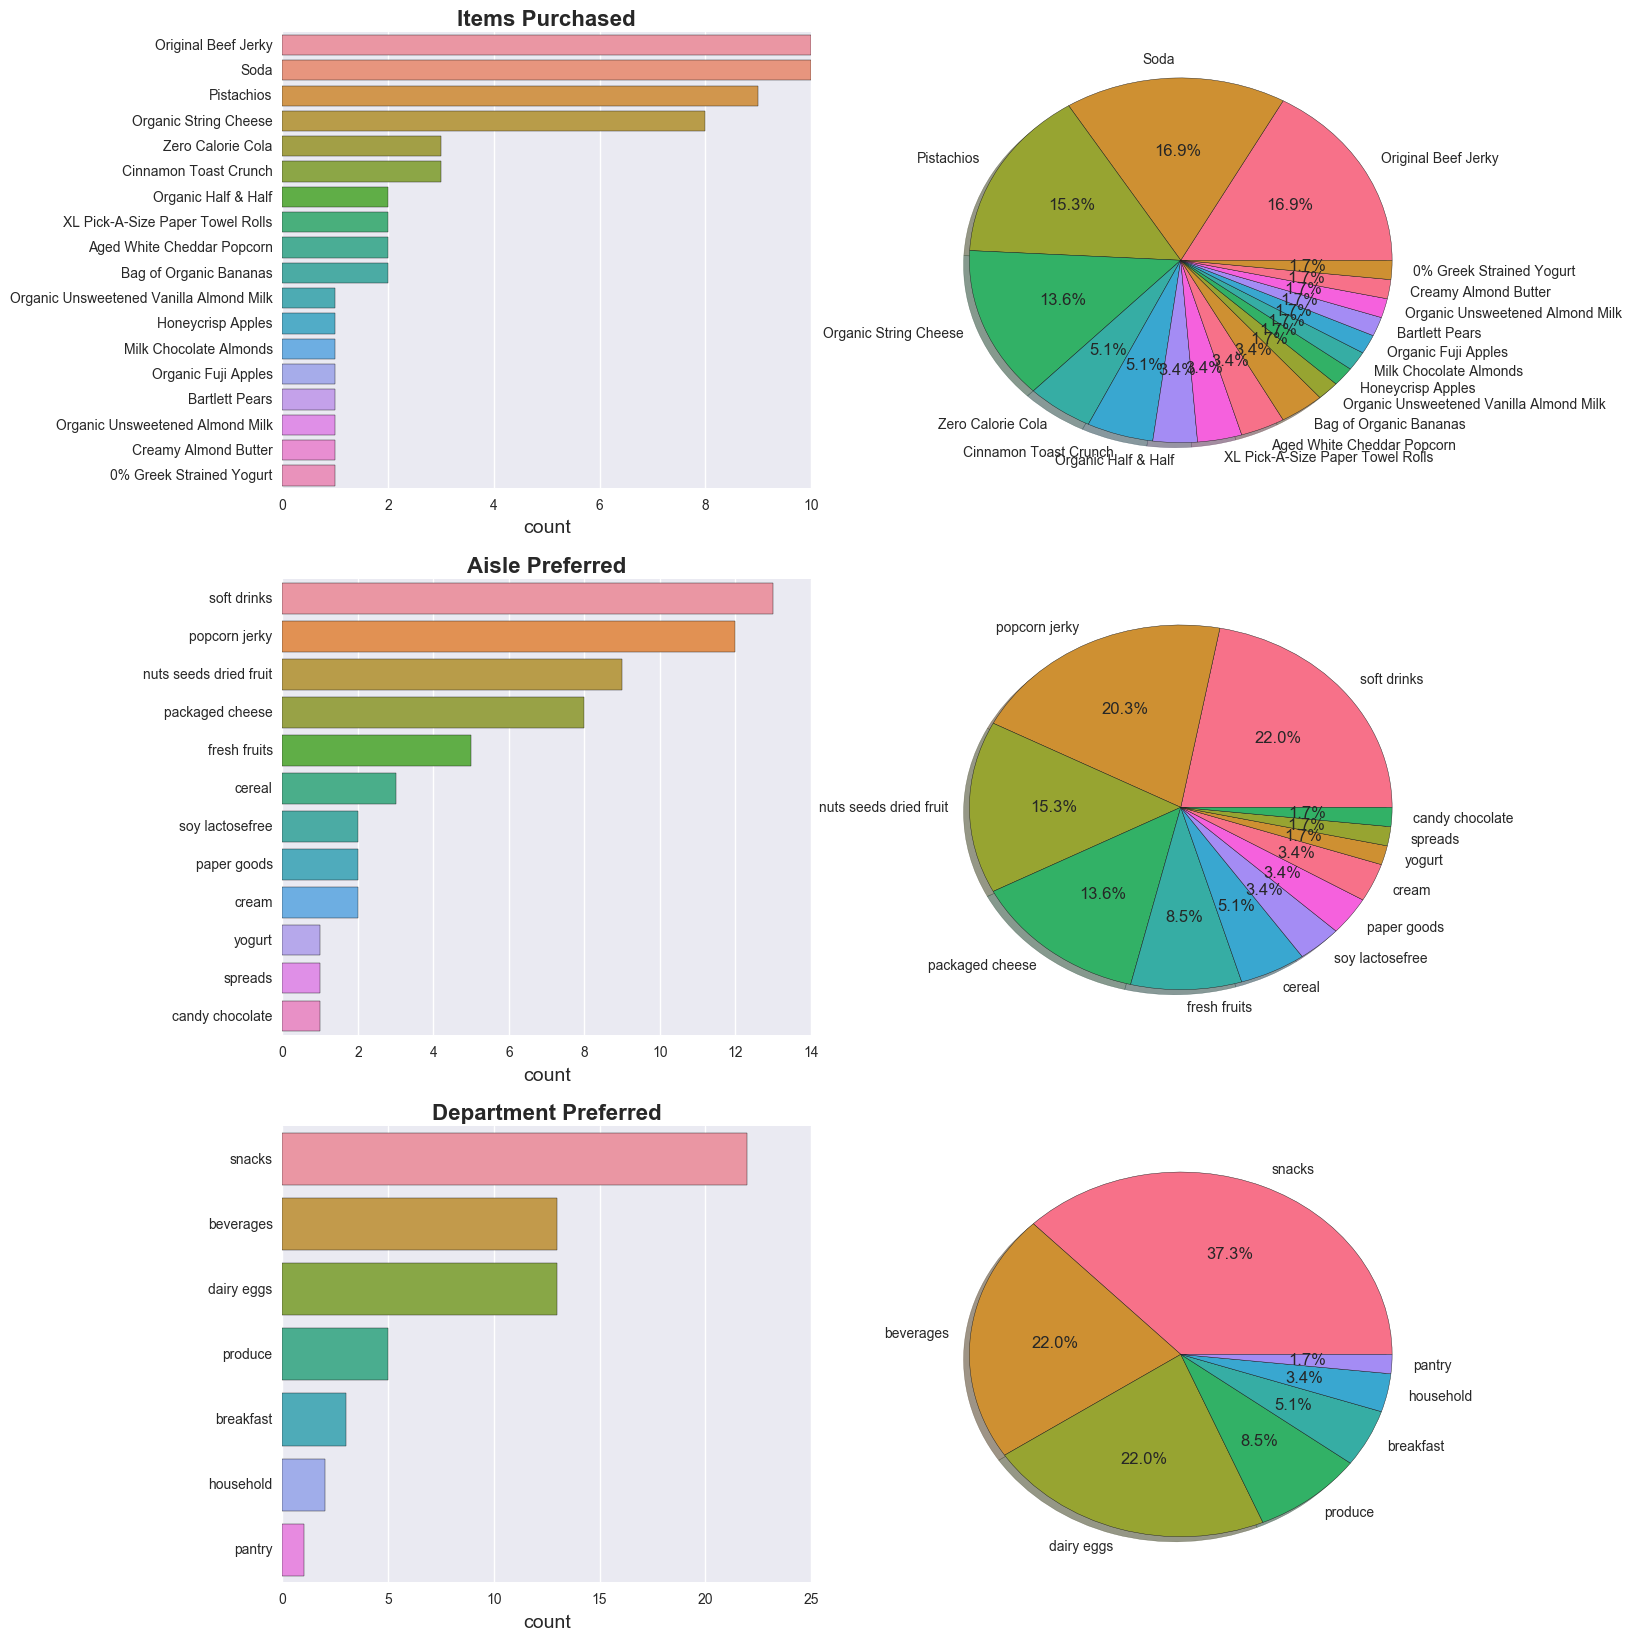

In [264]:

plt.figure(1, figsize=(15,20))
plt.subplot(321)
x_label = 'count'

# Items purchased by customer 1
items_purchased = cust_data.product_name.value_counts()
ip = sns.barplot(items_purchased.values,items_purchased.index)
ip.set_title('Items Purchased', fontsize=16 , fontweight='bold')
ip.set_xlabel(x_label, fontsize=14)

plt.subplot(322)
plt.pie(list(items_purchased.values),autopct='%1.1f%%',shadow=True, colors=sns.color_palette("husl", 8), labels=items_purchased.index);


# Aisle preferred by customer 1
cust_preferred_aisle = cust_data.aisle.value_counts() 
plt.subplot(323)
cpa = sns.barplot(cust_preferred_aisle.values, cust_preferred_aisle.index)
cpa.set_title('Aisle Preferred', fontsize=16 , fontweight='bold')
cpa.set_xlabel(x_label, fontsize=14)

plt.subplot(324)
plt.pie(list(cust_preferred_aisle.values),autopct='%1.1f%%',shadow=True, colors=sns.color_palette("husl", 8), labels=cust_preferred_aisle.index);


# Department preferred by customer 1
cust_preferred_dept = cust_data.department.value_counts() 
plt.subplot(325)
cpa = sns.barplot(cust_preferred_dept.values, cust_preferred_dept.index)
cpa.set_title('Department Preferred', fontsize=16 , fontweight='bold')
cpa.set_xlabel(x_label, fontsize=14)

plt.subplot(326)
plt.pie(list(cust_preferred_dept.values),autopct='%1.1f%%',shadow=True, colors=sns.color_palette("husl", 8), labels=cust_preferred_dept.index);


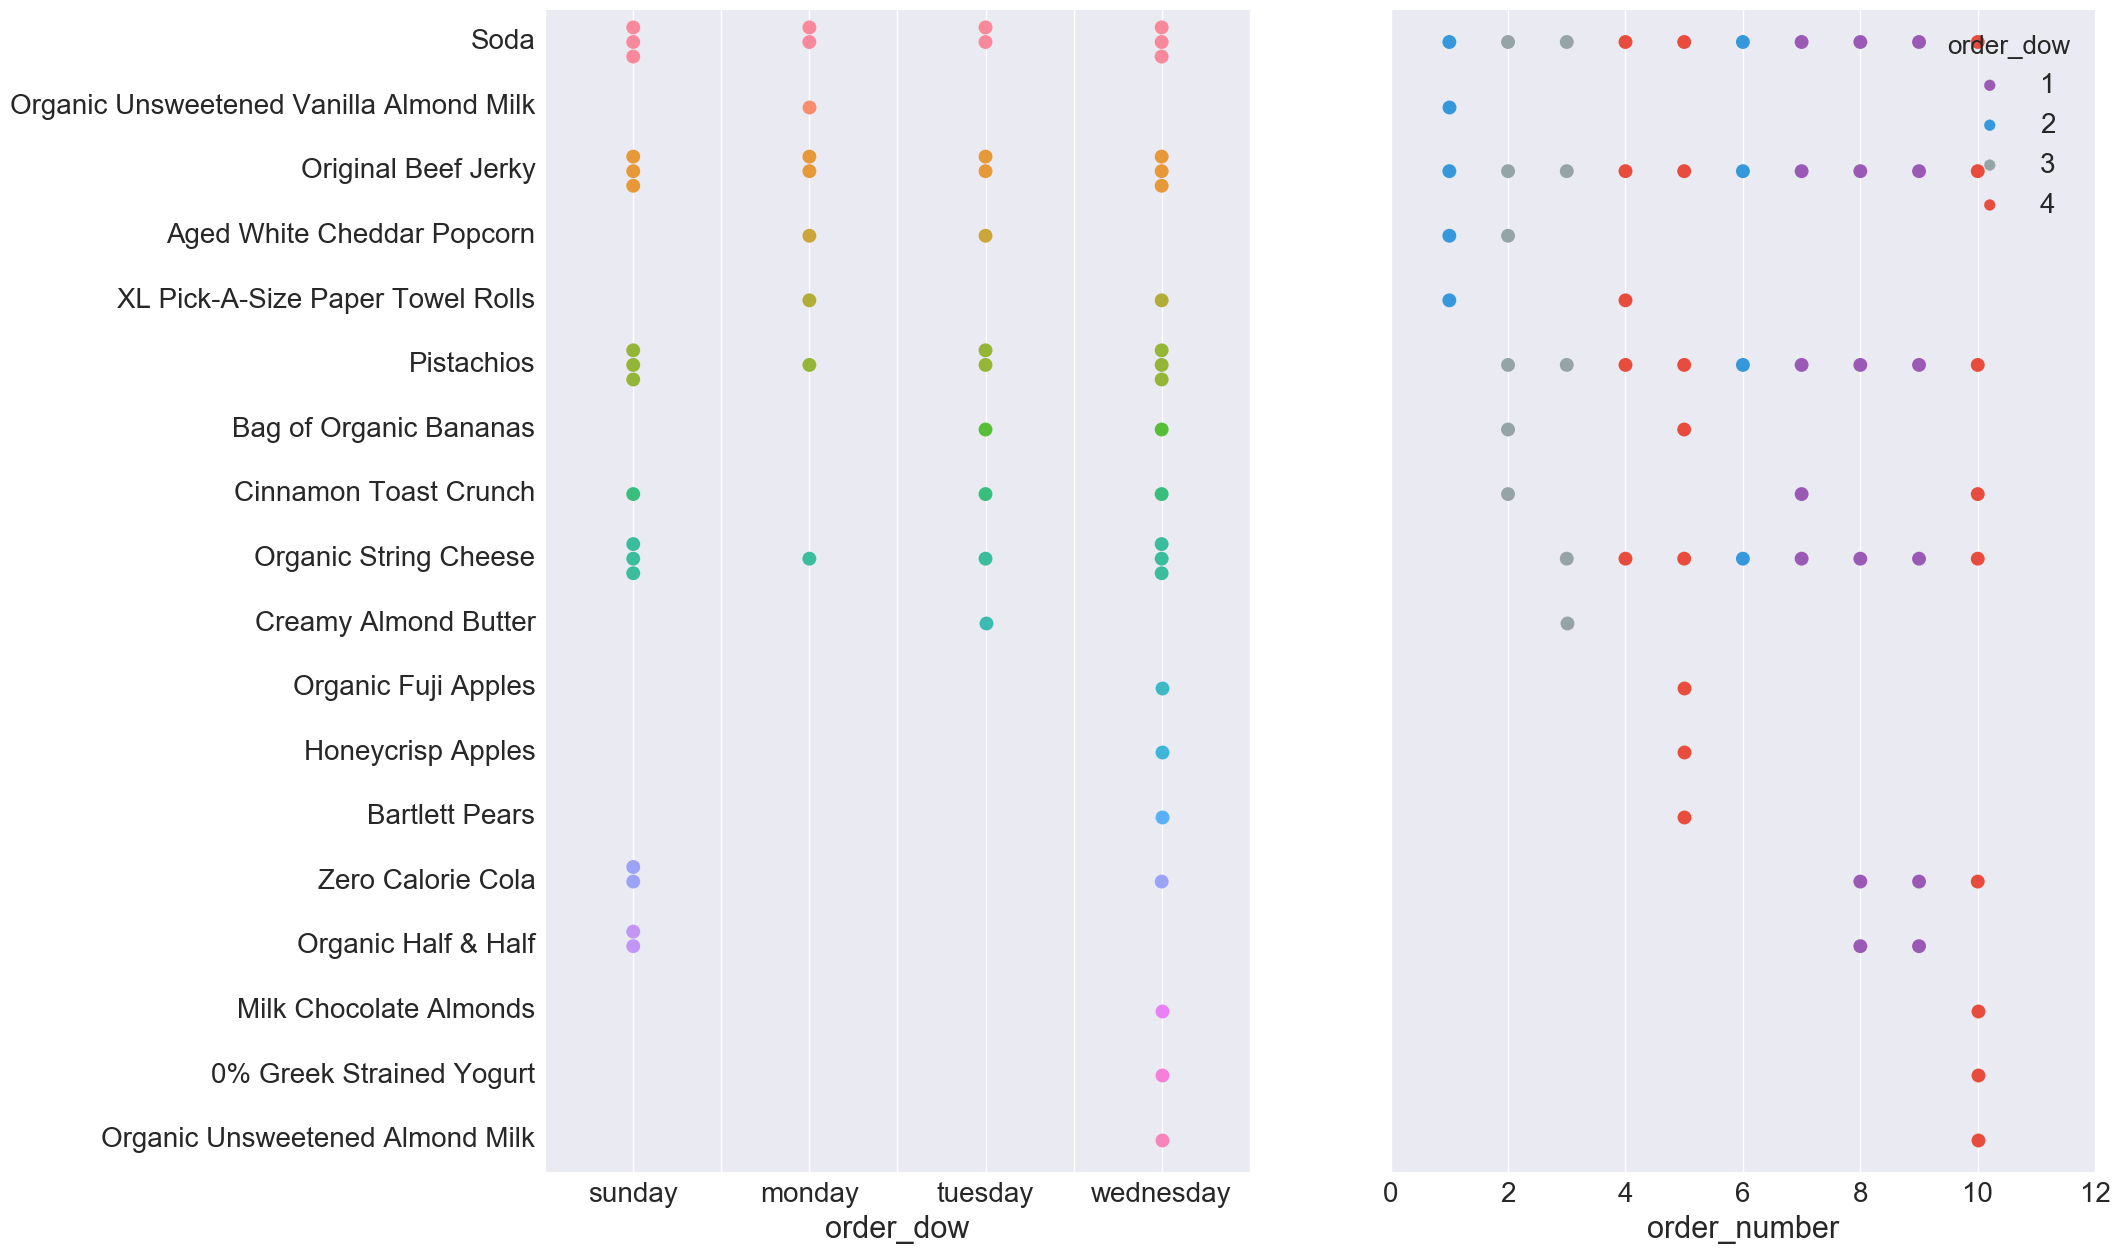

In [271]:
plt.figure(1,figsize= (20,15))
plt.subplot(121)
sns.set(font_scale = 2)
ax=sns.swarmplot(cust_data.order_dow,cust_data.product_name, size=10)
ax.set(xticklabels=['','sunday','','monday','','tuesday','','wednesday'], ylabel='');

plt.subplot(122)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c"]#, "#34495e", "#2ecc71"]

ax=sns.swarmplot(cust_data.order_number,cust_data.product_name, hue = cust_data.order_dow,  palette= sns.color_palette(flatui),  size=10)
ax.set(yticklabels=[''],ylabel='');

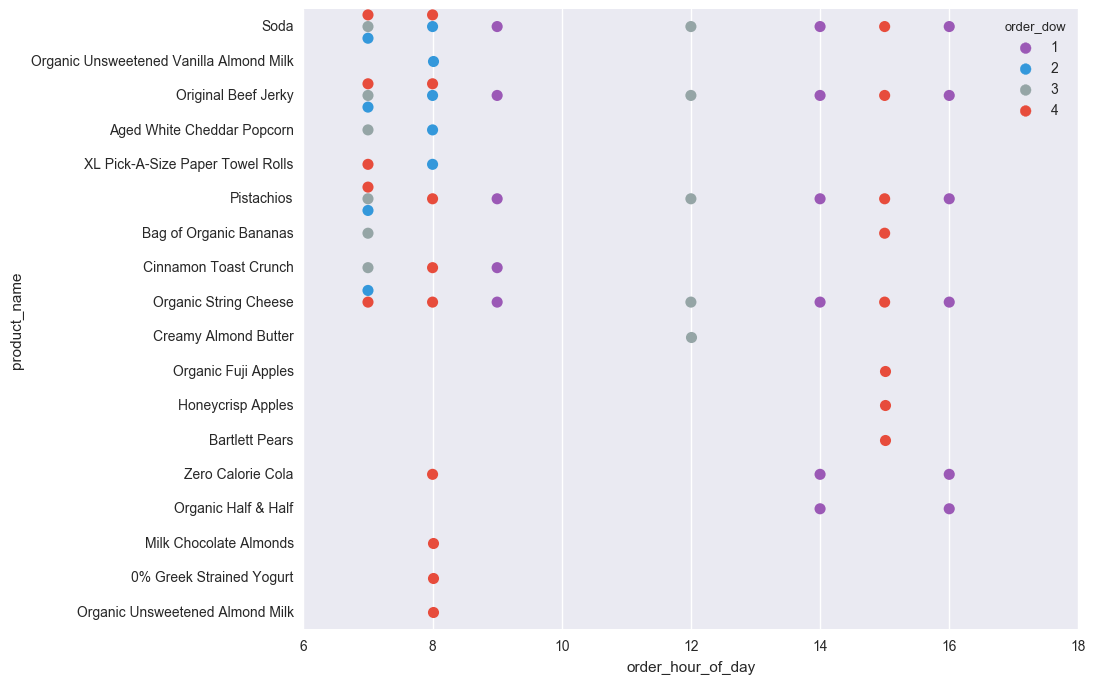

In [238]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 1)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.swarmplot(cust_data.order_hour_of_day,cust_data.product_name, hue=cust_data.order_dow, palette= sns.color_palette(flatui), size=8)

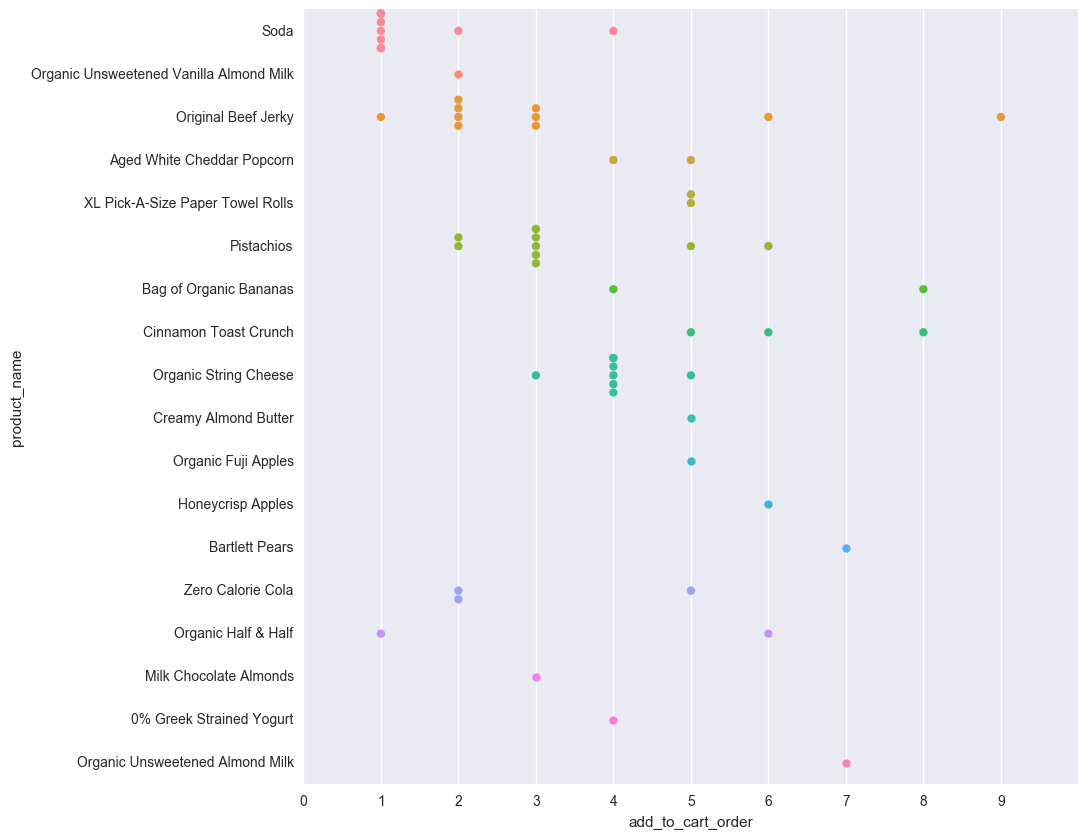

In [254]:
plt.figure(figsize=(10,10))
sns.set(font_scale = 1)
ax=sns.swarmplot(cust_data.add_to_cart_order,cust_data.product_name, size=6)
ax.xaxis.set_ticks(np.arange(0, 10,1));

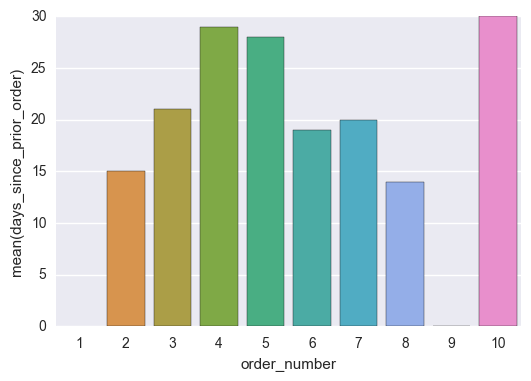

In [175]:
sns.barplot(cust_data.order_number,cust_data.days_since_prior_order)

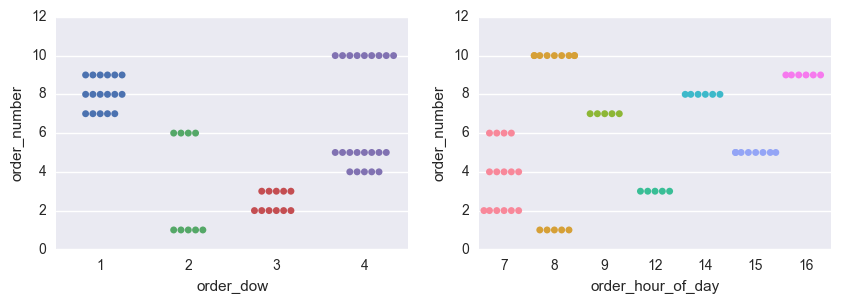

In [189]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.swarmplot(cust_data.order_dow, cust_data.order_number)

plt.subplot(122)
sns.swarmplot(cust_data.order_hour_of_day, cust_data.order_number)

### Study Outcome:

#### Looking at data from customer 1, we can see some pattern in the way he uses the app to buy
1. He buys Soda and Original Beef Jerky in every order
2. He adds Soda first to his cart followed by Original Beef Jerky, 3rd is pistachios , 4th is Organic String Cheese
3. He has mostly placed his orders on either Sunday or Wednesday
4. He orders at 7 am generally
5. On an average, he has a gap of 20 days between 2 orders